# 数据挖掘流程

核心目标

第一部分：导入必要的模块
1.导入库
2.加载数据集
3.数据集探索
4.关于此数据集
5.表格可视化

第二部分：概述和清理数据
1.概述
2.处理缺失值

第三部分：可视化和特征关系
1.性别和存活率
2.分类并存活
3.费用和生存
4.年龄和存活率
5.组合特征关系

第四部分：统计概述
1.统计概述
2.相关矩阵与热图

第五部分：特征工程

第六部分：特征预处理
1.分离因变量和自变量
2.分割培训数据
3.特征缩放

第七部分：数据建模
1.逻辑回归
2.k-最近邻（knn）
3.高斯朴素贝叶斯
5.决策树分类器
7.随机森林分类器
9.xgb分类器


# 核心目标


1.统计：做一个统计分析，分析哪些乘客是如何比其他人存活更多。

2.EDA：用可视化的方式对泰坦尼克号进行探索性数据分析（EDA）。

3.预测：使用机器学习分类模型预测乘客生存的机会。

# 第一部分：导入必要库和数据集

## 1.导入库

In [675]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决中文显示问题

## 2.读取数据

In [676]:
## Importing the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 3.数据一览

In [677]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [678]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [681]:
print ("训练数据集的shape为(row,column):"+ str(train.shape))
print ("训练数据集的shape为(row,column)::"+ str(test.shape))

训练数据集的shape为(row,column):(891, 12)
训练数据集的shape为(row,column)::(418, 11)


## 4.关于此数据集

从泰坦尼克号的数据样本中，我们可以看到船上每位旅客的特征：

Survived：是否存活（0代表否，1代表是）

Pclass：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）

Name：船上乘客的名字

Sex：船上乘客的性别

Age:船上乘客的年龄（存在 NaN）

SibSp：乘客在船上的兄弟姐妹和配偶的数量

Parch：乘客在船上的父母以及小孩的数量

Ticket：乘客船票的编号

Fare：乘客为船票支付的费用

Cabin：乘客所在船舱的编号（存在 NaN）

Embarked：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

## 5.表格可视化


# 第二部分：概述和清理数据

## 1.数据集概述

In [680]:
print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

通过以上一些特征的数据条目计数不等，可能原因如下：特征中存在缺失值、可能有分类特征或者可能有字母数字的文本特征。

## 2.异常值处理

In [685]:
# 测试集缺失比例
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
train_null_percent = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
train_null_percent

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [502]:
# 测试集缺失比例
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)
test_null_percent = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
test_null_percent

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


可以看到训练、测试集Cabin、Age、Fare三个特征存在缺失值

### Embarked Feature

In [503]:
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100,2))
## creating a df with th
total = pd.DataFrame(train.Embarked.value_counts(dropna=False))
## concating percent and total dataframe

total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


Embarked特征中只有两个空值（~0.22%），虽然我们可以用众数“S”替换它们，但可以再细看下存在缺失值的行数据有什么规律可循。

In [505]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


可以看出Embarked存在缺失值的乘客社会等级为一级阶层、船票价格都为80美元，结合这两个特征看一下Embarked的分布

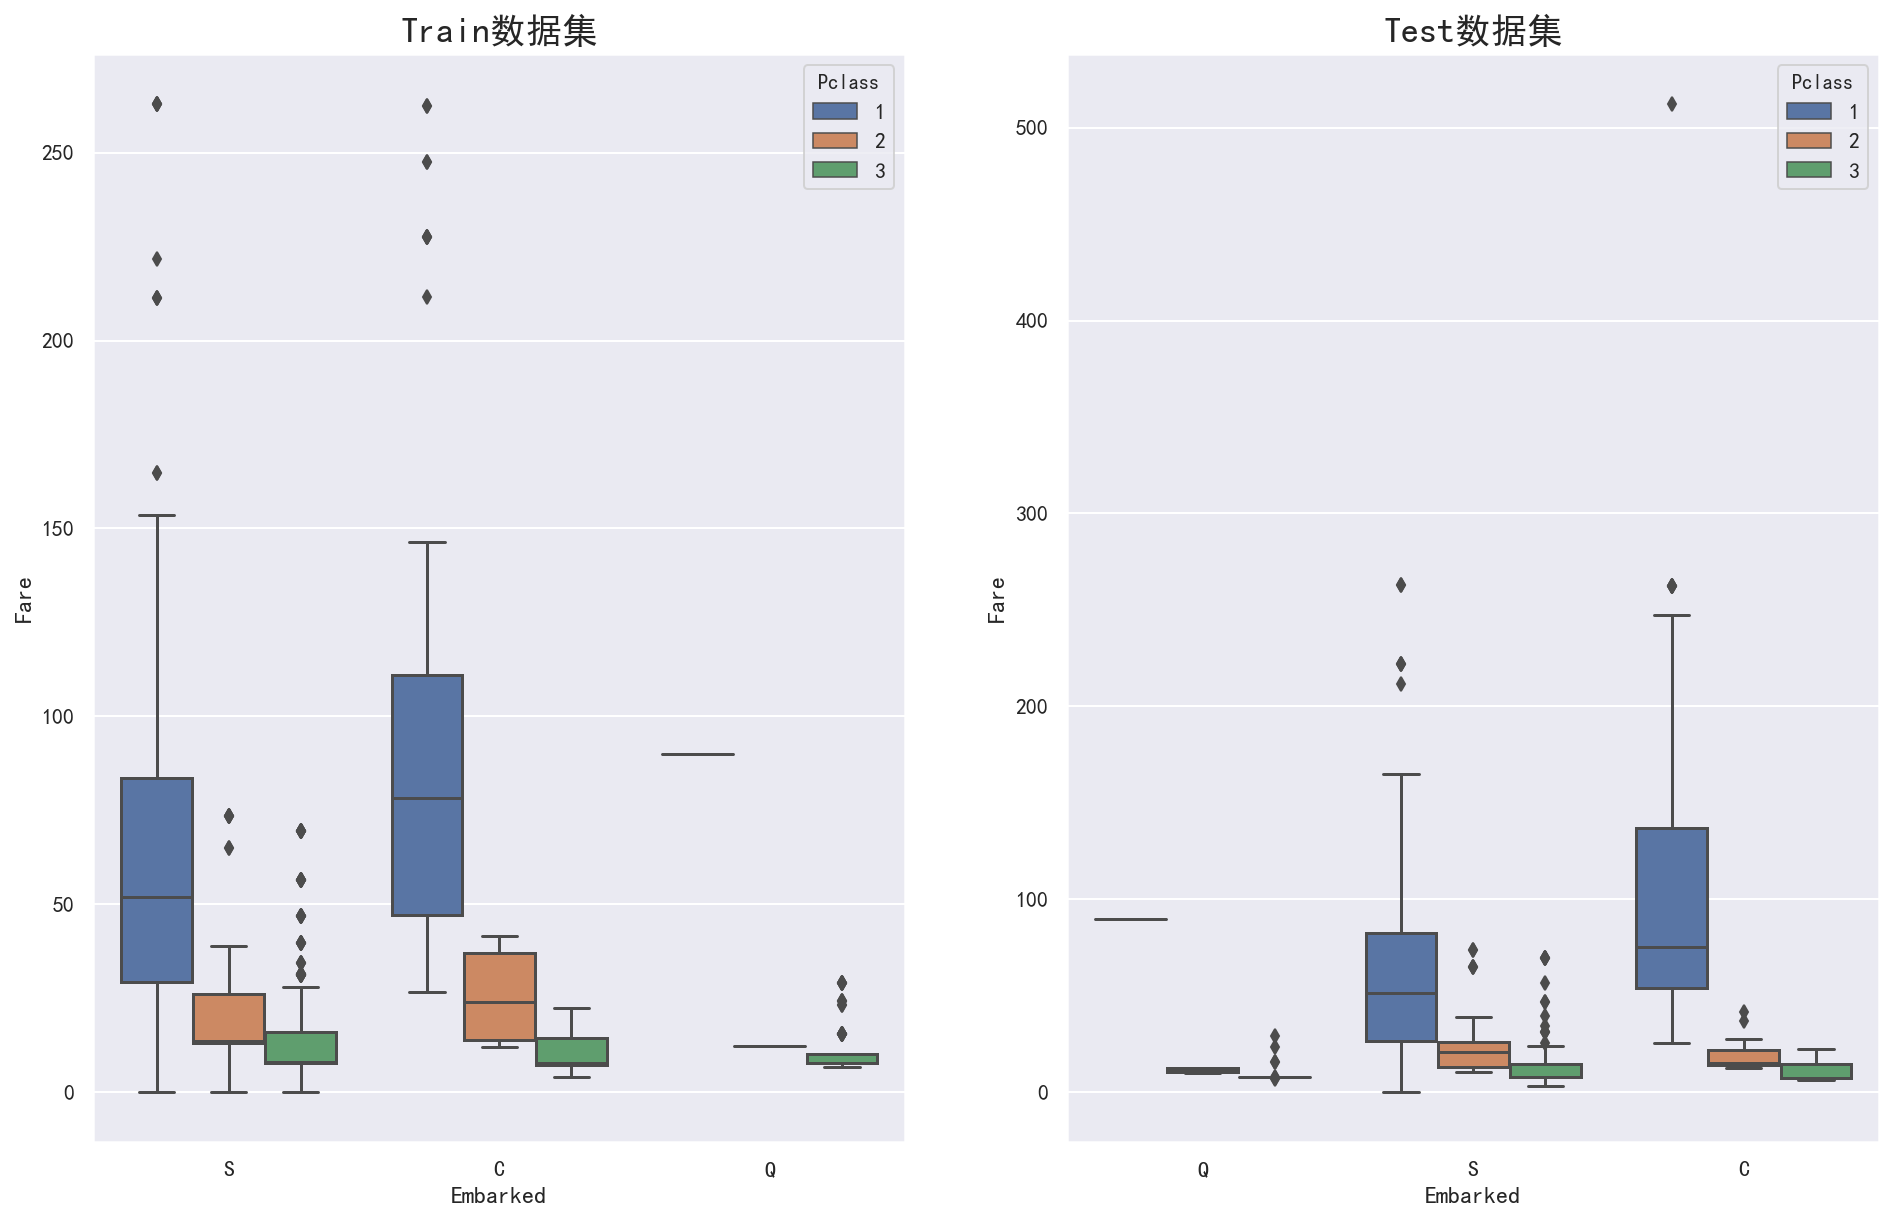

In [598]:
fig, ax = plt.subplots(figsize=(16,10),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Train数据集", fontsize = 18)
ax2.set_title('Test数据集',  fontsize = 18)
fig.show()

从箱型分布结果可以看出，在train和test数据集中，社会阶级为一级、票价最接近80美元的乘客多数集中在“C”港口。可以把缺失的值填充成“C”

In [507]:
#Embarked缺失值填充
train.Embarked.fillna("C", inplace=True)
#填充处理结果确认
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Cabin Feature

In [508]:
print("Train数据集Cabin缺失值比例: " + str(round(train.Cabin.isnull().sum()/len(train.Cabin),2)))
print("Test 数据集Cabin缺失值比例: " + str(round(test.Cabin.isnull().sum()/len(test.Cabin),2)))

Train数据集Cabin缺失值比例: 0.77
Test 数据集Cabin缺失值比例: 0.78


train数据集Cabin特征存在77%的缺失值，Test数据集Cabin特征存在79%的缺失值。由于缺失值较多有两个处理选择:

1.取消整列

2.可以说有船舱编号记录的乘客比其他乘客具有更高的社会经济地位。也可以说，有船舱编号记录的乘客在上船时更容易被考虑。

可以先把train和test数据结合起来，把所有的空值指定为“N”，方便后续识别这些缺失数据

In [509]:
## 将train和test数据集合并成成 "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## 填充所有的Cabin缺失值为N
all_data.Cabin.fillna("N", inplace=True)

In [510]:
#取出船舱编号首字母并替换Cabin特征原有的数据
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [511]:
#对Cabin进行分组并计算船票价格
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

将每个未知的船舱编号行所对应的船票价格与上面给出的平均值进行比较，来确定未知的船舱编号

In [512]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

In [513]:
# 重新拆回成训练集和测试集
all_data = pd.concat([with_N, without_N], axis=0)
all_data.sort_values(by = 'PassengerId', inplace=True)
train = all_data[:891]
test = all_data[891:]
train['Survived'] = survivers

### Fare Feature

In [514]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


虽然可以取Fare列的平均值作为缺失进行填充。但可以更具体一点，取社会阶级为三级，性别是男性，上船港口是S的平均值作为船票费用。

In [515]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
test.Fare.fillna(missing_value, inplace=True)

### Age Feature

In [516]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


处理空值的一些标准方法是用平均值、众数进行替换。但是train和test数据集Age特征中都缺失约20%的数据。
且年Age特征似乎有希望确定存活率。因此用中间值、平均值来替换缺缺失的年龄值是不明智的。后续将使用机器
学习模型随机森林估计器来确定该缺失值。现在将保持“年龄”列不变，并在“特征工程”部分中对此进行处理。

# 第三部分：特征关系与可视化

本部分将研究不同特征和目标值（幸存与否）之间的关系

## Sex and Survived 

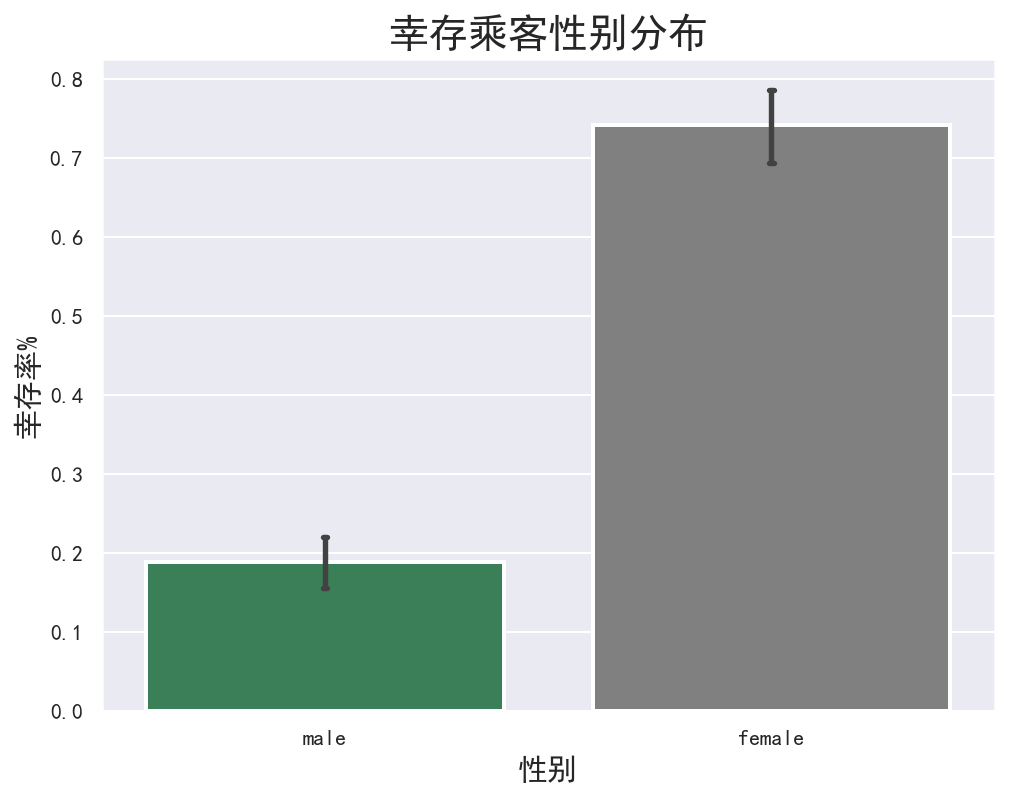

In [552]:
plt.rc("font",family="SimHei",size="12")  #用于解决中文显示不了的问题
pal = {"seagreen", "gray"}
plt.subplots(figsize = (8,6),)
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            linewidth=2,
            capsize=.01,
            palette=pal)
plt.title("幸存乘客性别分布", fontsize = 20);
plt.ylabel("幸存率%", fontsize = 15);
plt.xlabel("性别",fontsize = 15);

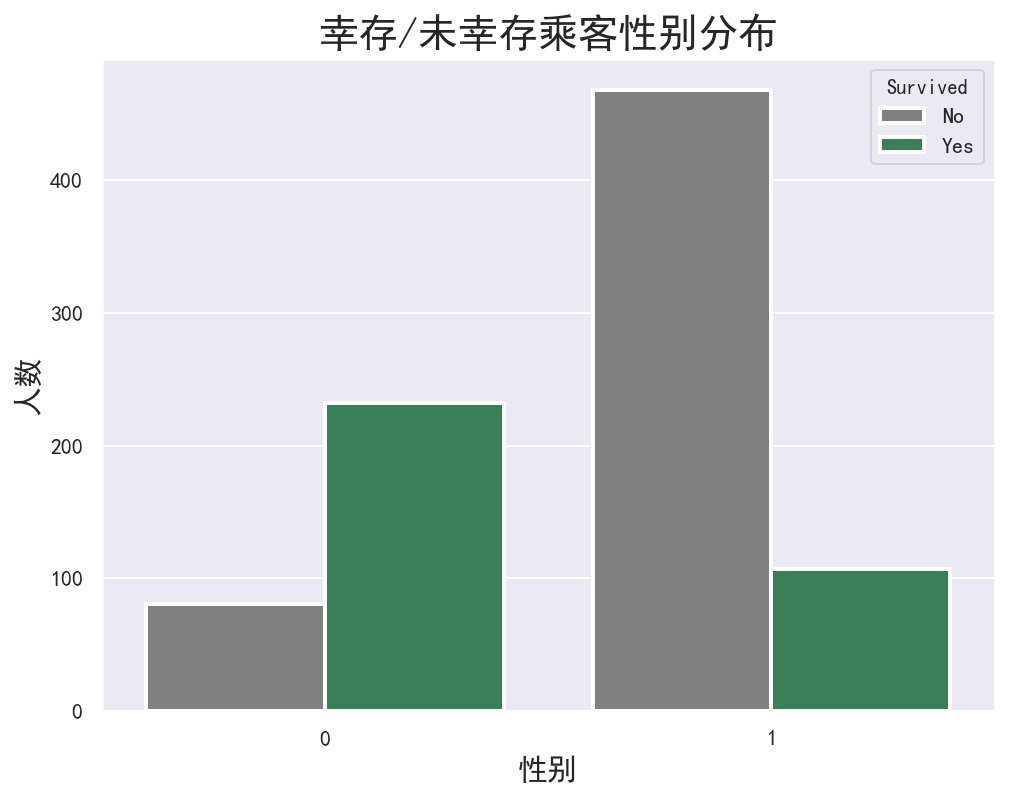

In [672]:
pal = {1:"seagreen", 0:"gray"}
plt.subplots(figsize = (8,6))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = pal,
                   capsize=.01
                   
)

# 设置title, xlabel,ylabel
plt.title("幸存/未幸存乘客性别分布", fontsize = 20)
plt.xlabel("性别", fontsize = 15);
plt.ylabel("人数", fontsize = 15)

## 设置图例
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

此计数图显示存活和未存活的男女乘客的实际分布，结果显示：在女性的乘客中，约230人幸存，70人未幸存。而在男性乘客中，约110人幸存，约480人未幸存。女性乘客的存活率比男性乘客高很多。


## Pclass and Survived

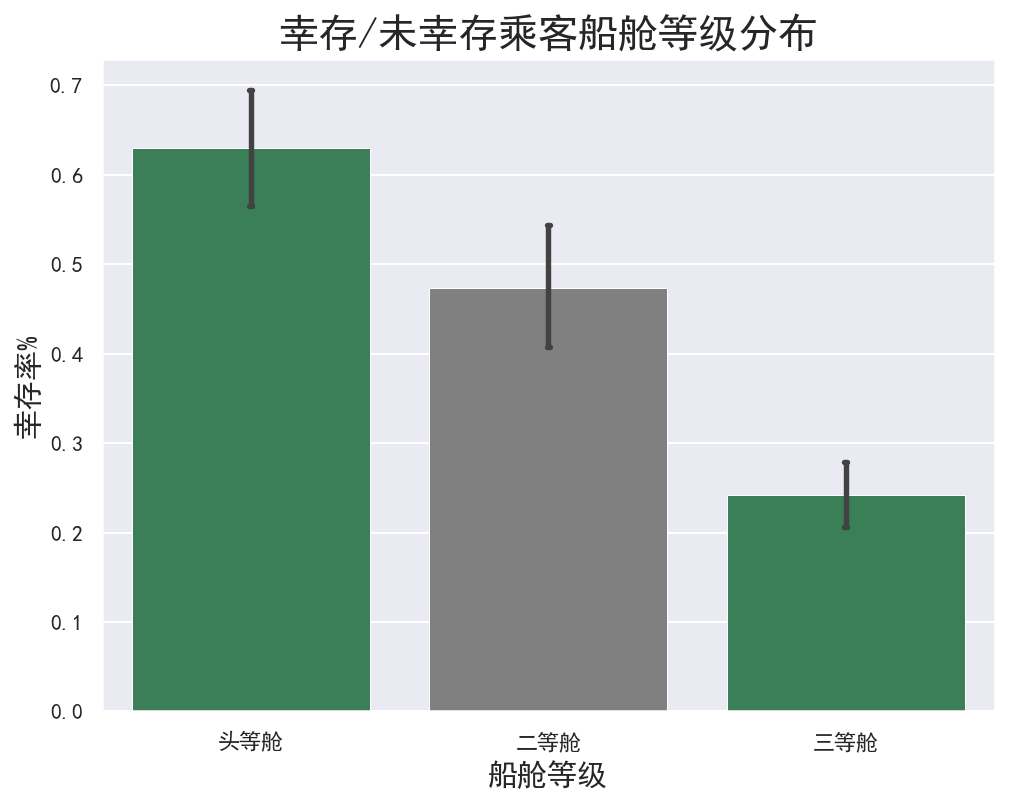

In [682]:
plt.subplots(figsize = (8,6))
pal = {"seagreen", "gray"}
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=0.5,
            capsize=.01,
            palette=pal)
plt.title("幸存/未幸存乘客船舱等级分布", fontsize = 20)
plt.xlabel("船舱等级", fontsize = 15);
plt.ylabel("幸存率%", fontsize = 15);
labels = ['头等舱', '二等舱', '三等舱']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

图表显示约63%的头等舱乘客幸免于难，而约48%的二等舱和只有24%的三等舱乘客幸存

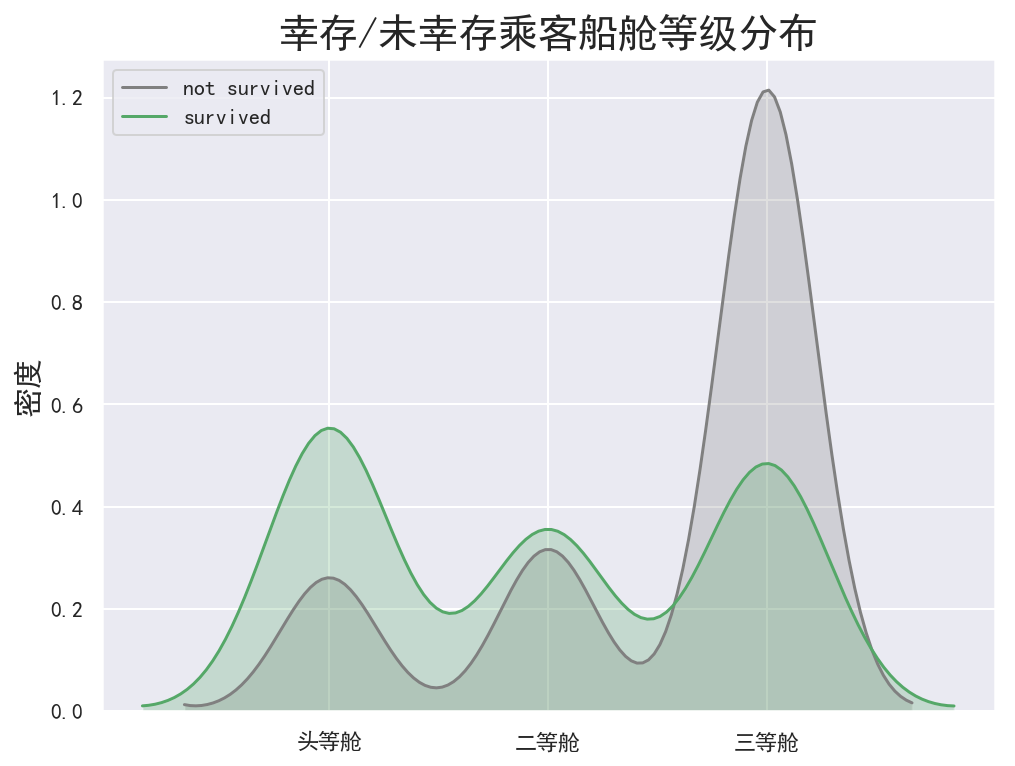

In [576]:
# Kernel Density Plot
fig = plt.figure(figsize=(8,6),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('幸存/未幸存乘客船舱等级分布', fontsize = 20)
plt.ylabel("密度", fontsize = 15)
#plt.xlabel("船舱等级", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['头等舱', '二等舱', '三等舱']
plt.xticks(sorted(train.Pclass.unique()), labels);

这个kde图显示三等舱的乘客比二等舱的乘客存活得更多，是因为三等舱的乘客比一等舱和二等舱的多。

总结:头等舱的乘客的幸存率明显比比二等舱和三等舱的乘客都高

## Fare and Survived

Text(0.5, 0, '票价')

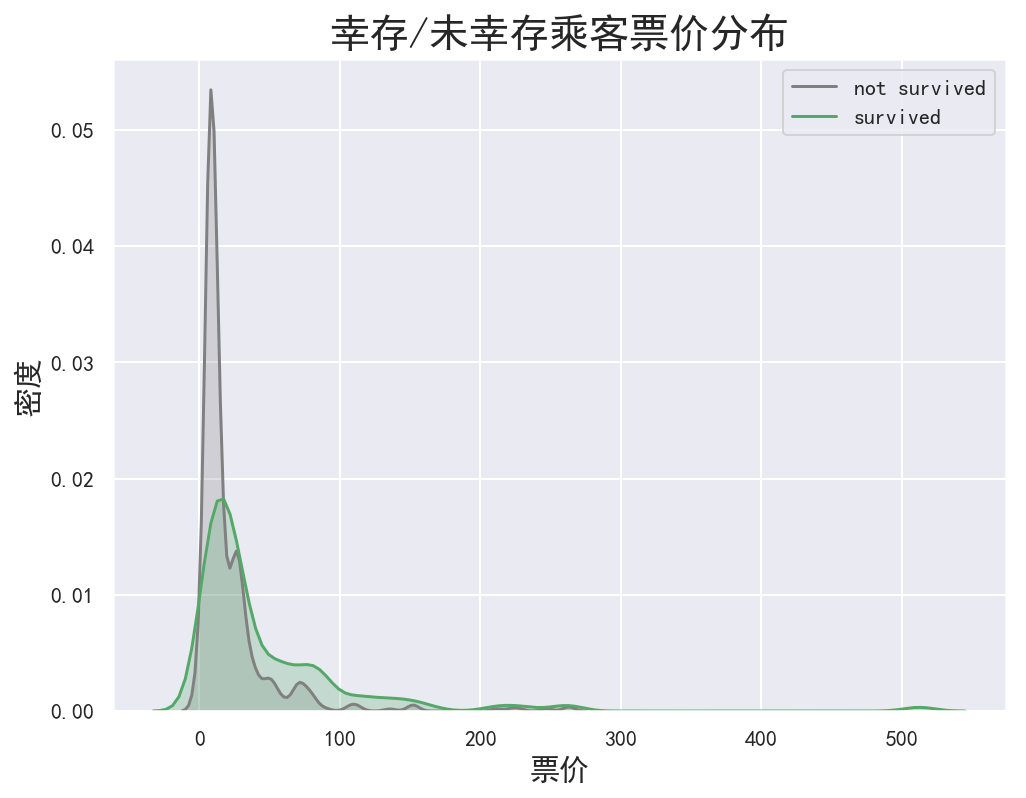

In [575]:
# Kernel Density Plot
fig = plt.figure(figsize=(8,6),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('幸存/未幸存乘客票价分布', fontsize = 20)
plt.ylabel("密度", fontsize = 15)
plt.xlabel("票价", fontsize = 15)

图表中票价低于100美元这一范围内许多乘客都未幸存，当票价大约超过280美元时，就没有灰色阴影，大多数乘客幸存下来，要么可能有些离群值模糊了我们的判断。检查一下……

In [574]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


In [ ]:
正如假设的那样，存在一些离群值为512美元的船票费用，当然可以删除这一点。不过先暂时保留它。

## Age and Survived

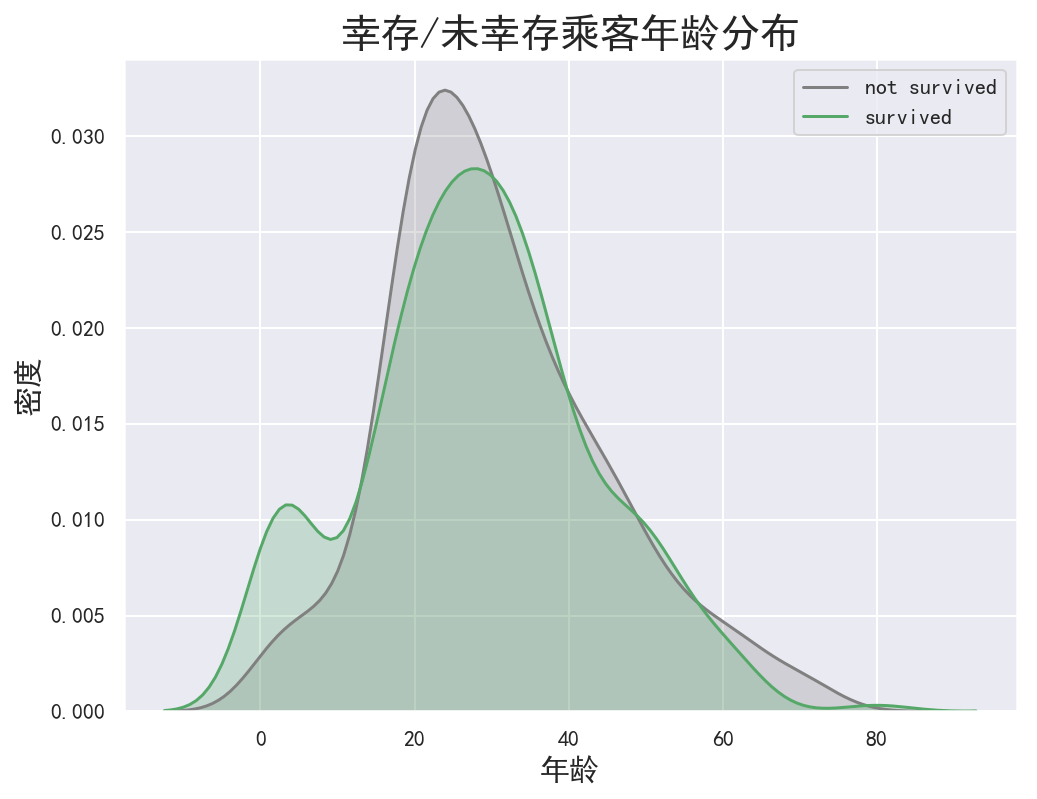

In [577]:
# Kernel Density Plot
fig = plt.figure(figsize=(8,6),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('幸存/未幸存乘客年龄分布', fontsize = 20)
plt.xlabel("年龄", fontsize = 15)
plt.ylabel('密度', fontsize = 15);

图表结果显示除了分布图左边部分有所不同，其余的都差不多，这也证明儿童和婴儿是优先考虑的，大量的婴儿/儿童得到了保护。

## 3.组合特征关系

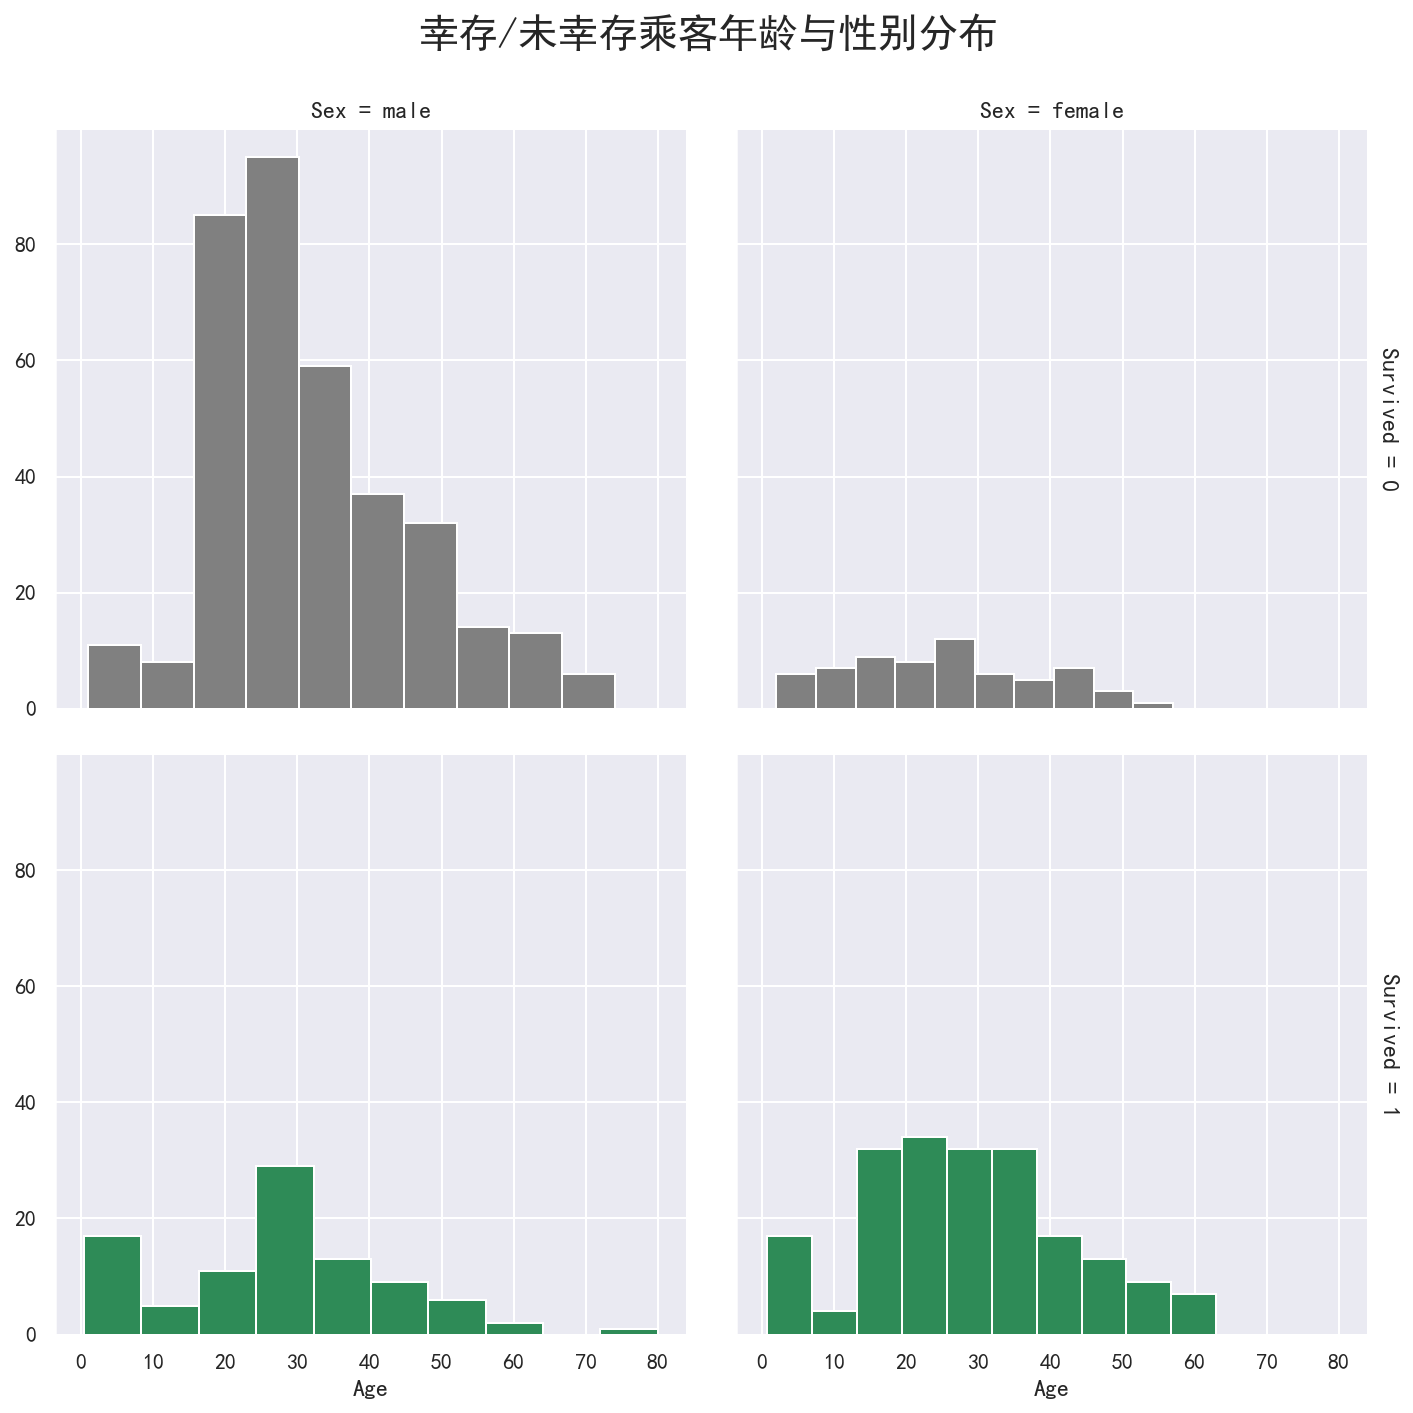

In [580]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("幸存/未幸存乘客年龄与性别分布", size = 20)
plt.subplots_adjust(top=0.90)

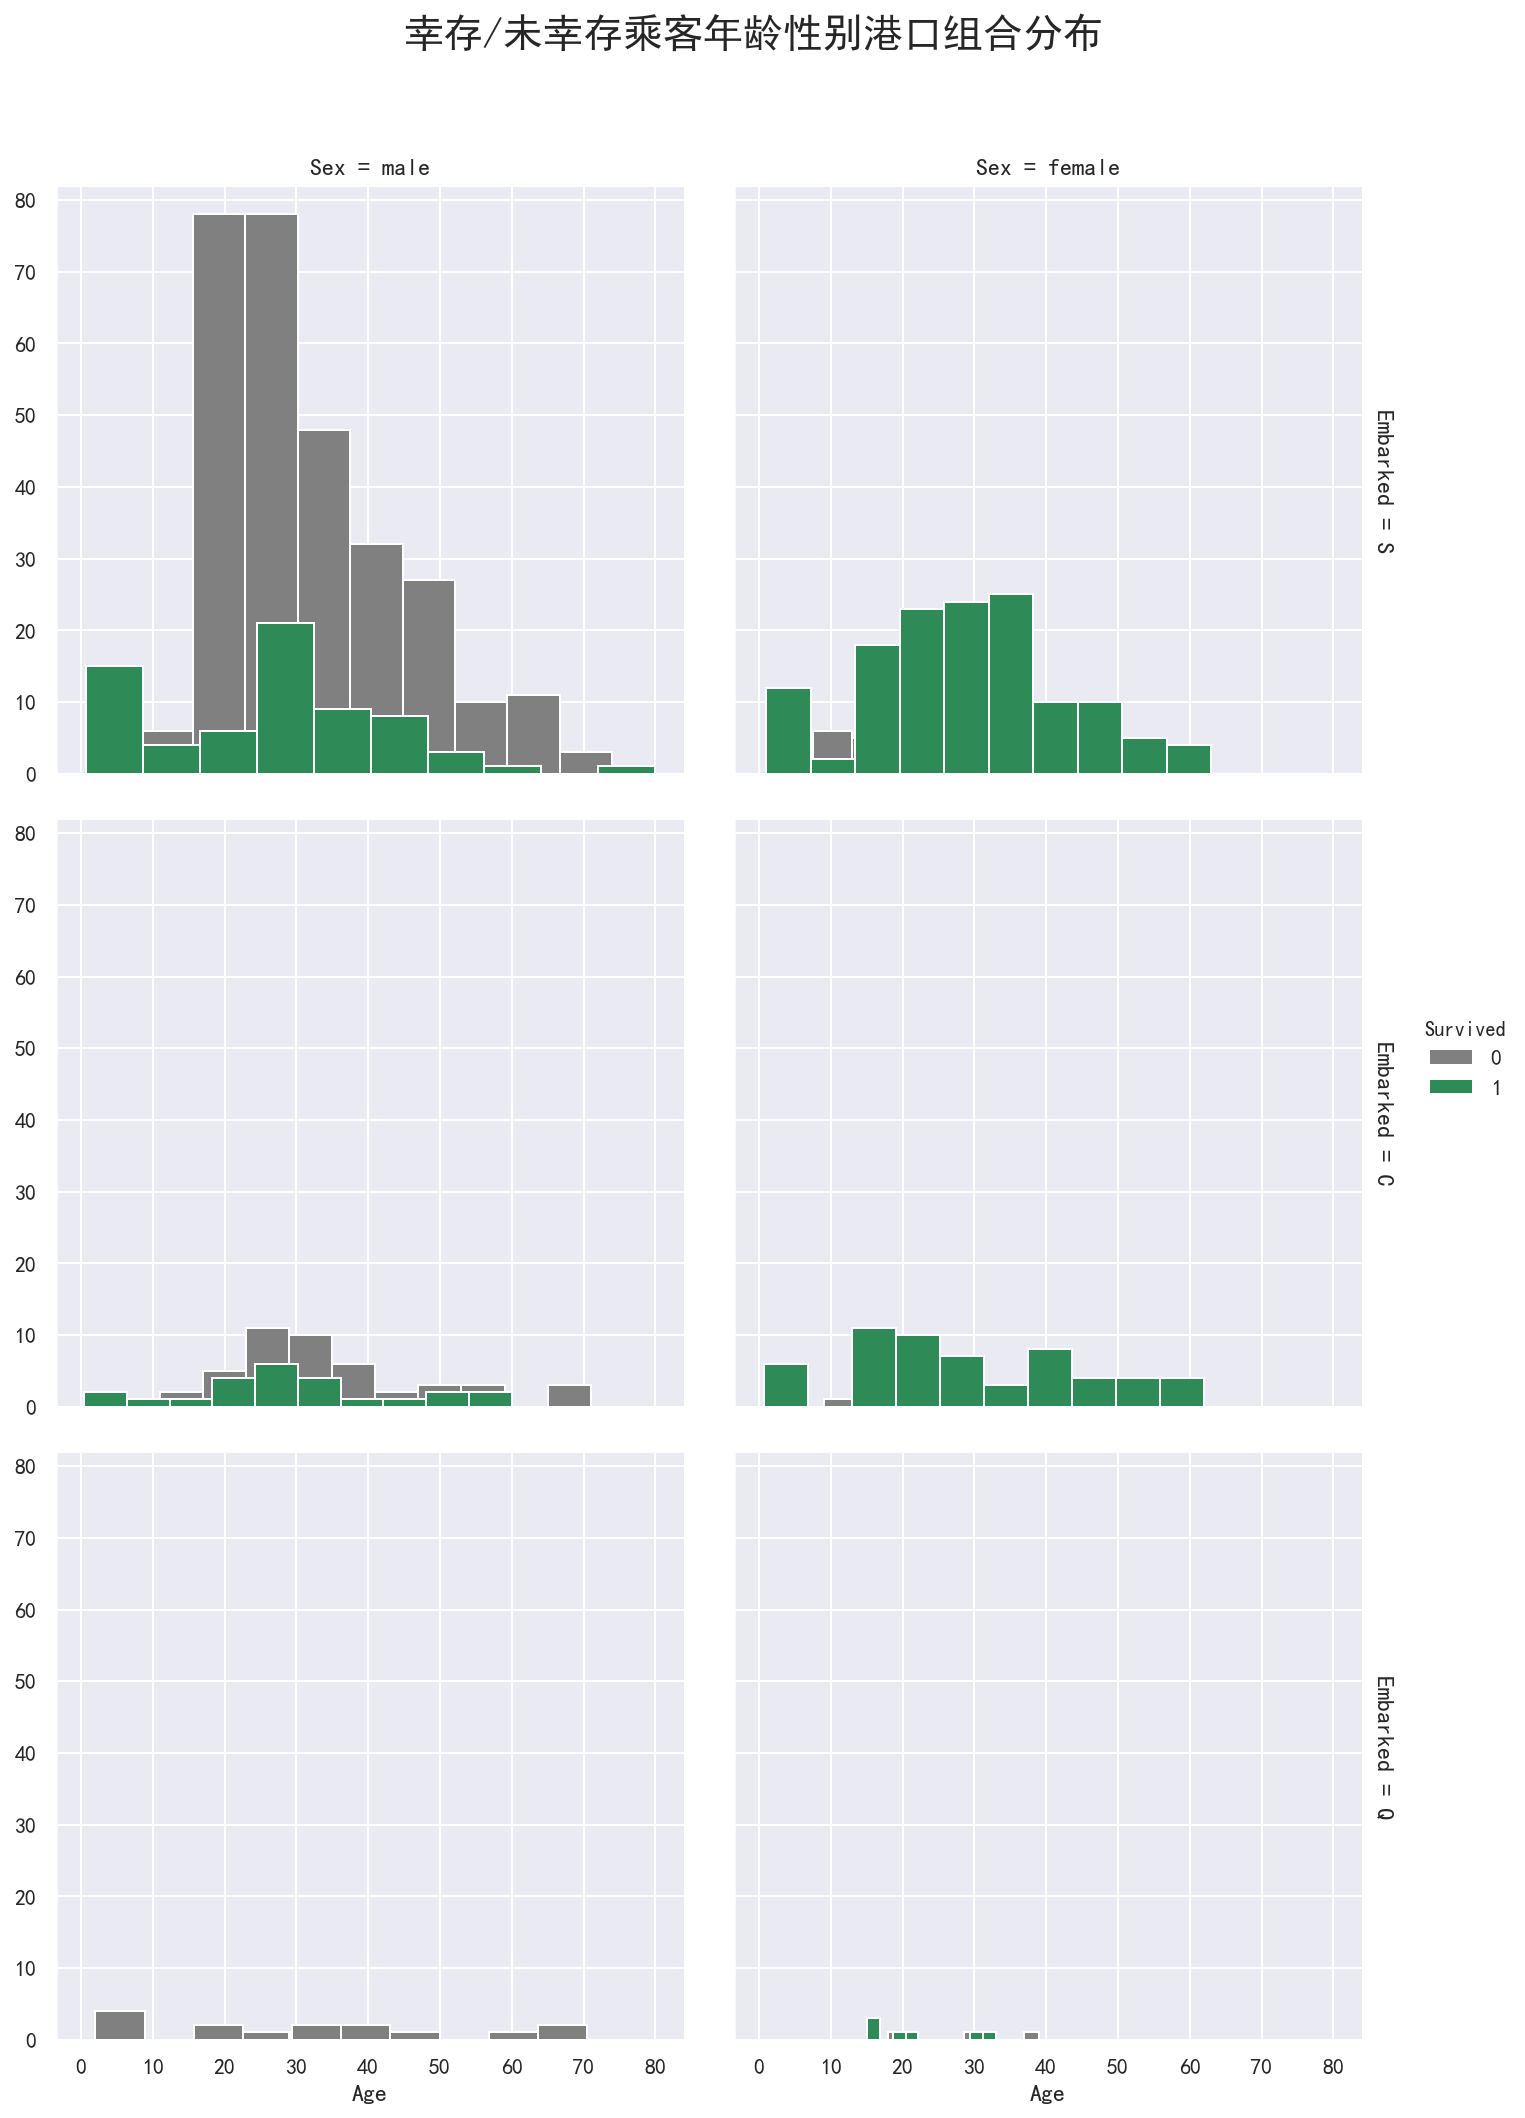

In [582]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("幸存/未幸存乘客年龄性别港口组合分布", size = 20)
plt.subplots_adjust(top=0.90)

图表显示大多数乘客都是在S港口登船；超过60%的S港口登录的乘客未能幸存；超过60%的C港口登船的乘客都幸存下来；几乎所有Q港口登录的男性都未能幸存下来；在Q港口登船的女性很少，大多数都幸存下来。

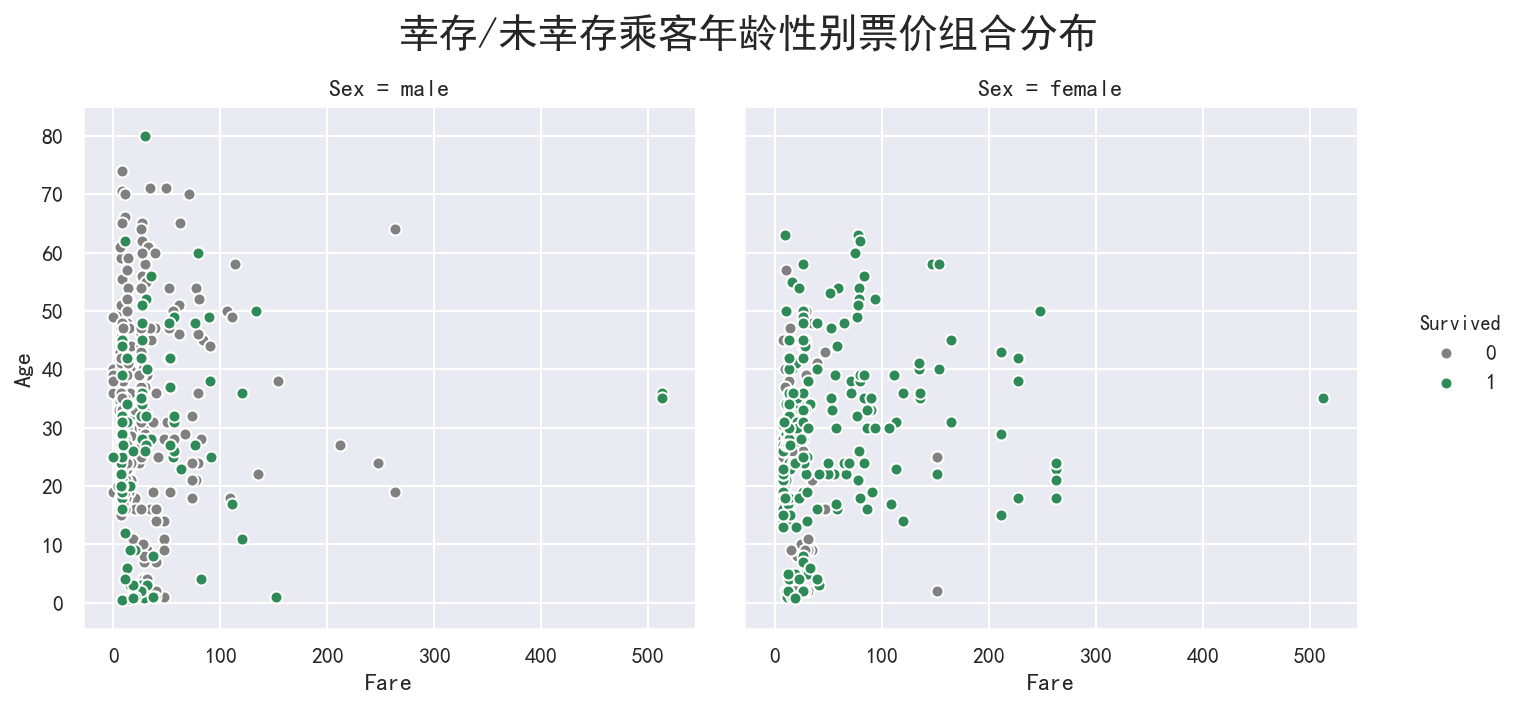

In [586]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("幸存/未幸存乘客年龄性别票价组合分布", size = 20)
plt.subplots_adjust(top=0.85)

图表显示大多数乘客的票价都是100美元区间。有明显的三个离群值(船票超过500美元)，可以删除这些离群值。

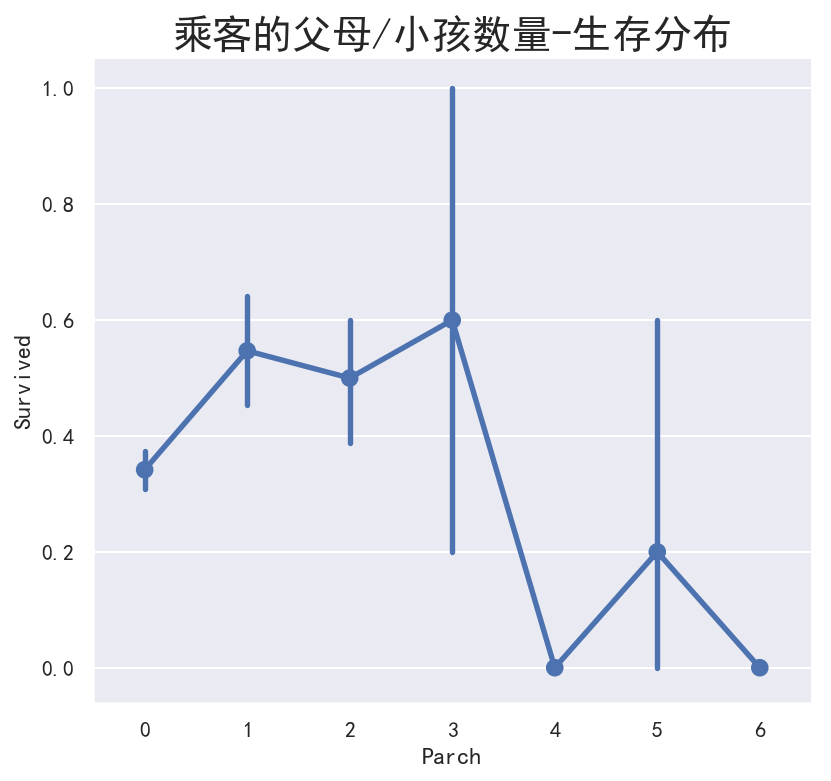

In [592]:
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 6)
plt.title("乘客带父母/小孩数量-生存分布", fontsize = 20)
plt.subplots_adjust(top=0.85)

与其他乘客相比，带父母/孩子的大群体乘客的幸存率较低

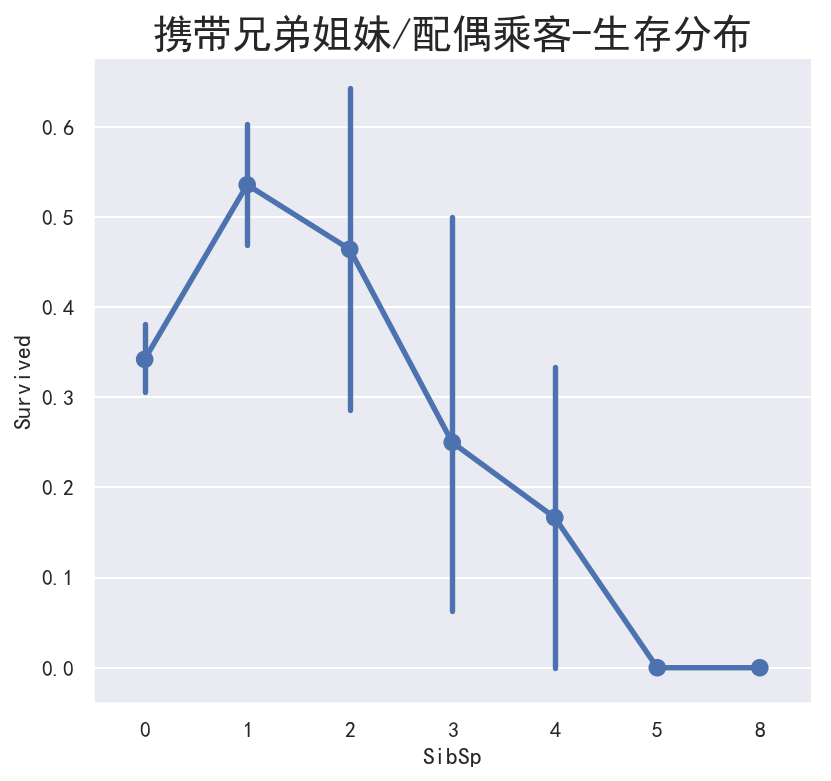

In [601]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 6)
plt.title('携带兄弟姐妹/配偶乘客-生存分布', fontsize = 20)
plt.subplots_adjust(top=0.85)

In [ ]:
携带兄弟姐妹/配偶的小群体旅客的存活率高于其他旅客。

In [602]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# 第四部分：统计概述

### train info

In [603]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [604]:
train.describe(percentiles=[0])

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
0%,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [605]:
train[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [606]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [607]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [608]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


##  1.相关矩阵与热图

### Correclations

In [609]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


Sex是与Survived（目标值）最重要的相关特征，其次是Pclass。

In [610]:
## get the most important variables. 
corr = train.corr()**2
pd.DataFrame(corr.Survived.sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.298006
Pclass,0.111601
Fare,0.068509
Parch,0.006750
Age,0.006316
SibSp,0.001115
PassengerId,0.000048


将相关特征平方不仅能给出正相关，而且能放大相关关系

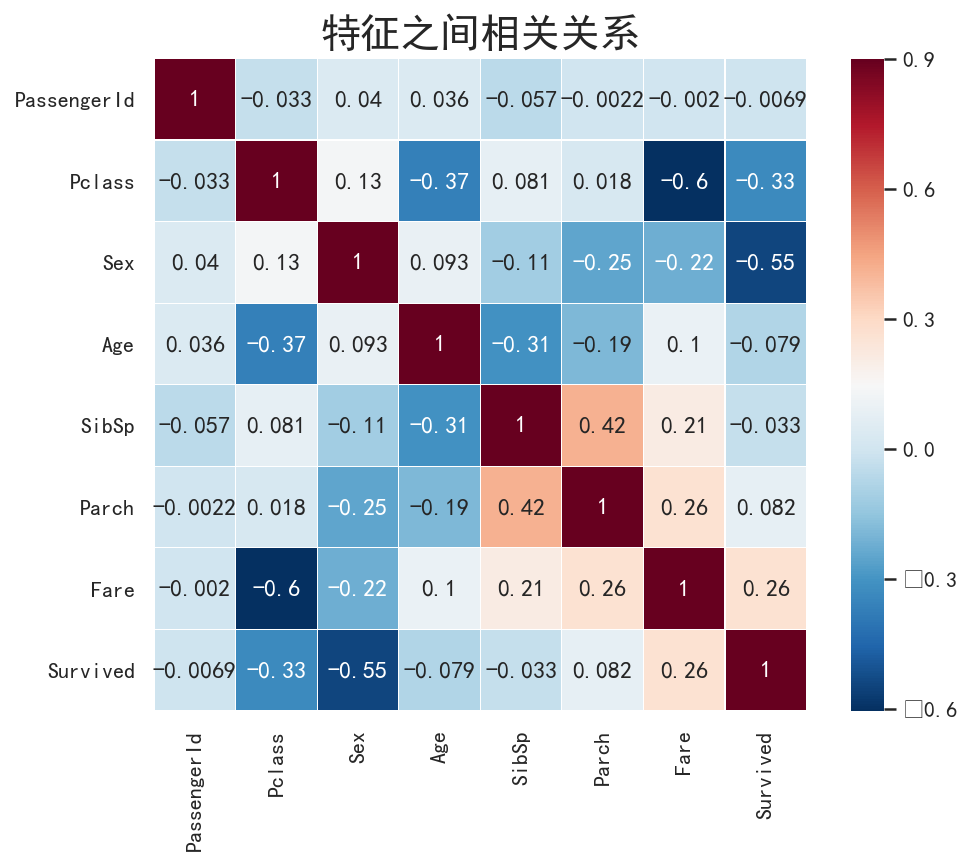

In [614]:
# 通过热力图看特征之间的相关关系
plt.subplots(figsize = (8,6))
sns.heatmap(train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("特征之间相关关系", y = 1.03,fontsize = 20);

正相关特征：Fare和Survived： 0.26

负相关特征：Fare和Pclass：-0.6

          Sex和Survived：-0.55

          Pclass与Survived：-0.33

从相关关系图中可以发现不同特征之间有一些中等强度的关系。Fare与Survived之间存在正相关关系(0.26)。这种关系也表明，付了更多钱买票的乘客更有可能幸存下来。这一结论与另一个相关性相一致，即Fare与pclass之间的相关性(-0.6)。这种关系可以用头等舱乘客比二等舱乘客支付更多的票价来解释，这个结论也可以通过另一个与我们的因变量相关的Pclass幸存来支持，Pclass与存活率的相关性为(-0.33)。然而，与我们的特征Survived最显著的相关性是Sex变量（-0.54),通过相关关系我们可以在特征工程中对特征进行进一步的拆分。

# 第五部分 特征工程

通过特征工程可以创建新的特征以删除相似的特征，以避免导致多重共线性（当独立变量之间存在关系时）。

###  Name_length
创建一个新特征name_length

In [616]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].apply(name_length_group)
test['nLength_group'] = test['name_length'].apply(name_length_group)

### title feature
创建一个新特征title

In [617]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

In [618]:
print(train.title.unique())
print(test.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
[' Mr' ' Mrs' ' Miss' ' Master' ' Ms' ' Col' ' Rev' ' Dr' ' Dona']


In [619]:
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]
# test Data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

### family_size feature
创建一个新特征 family_size

In [620]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [621]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['fameily_group'] = train.family_size.apply(family_group)
test['fameily_group'] = test.family_size.apply(family_group)

### Ticket feature

In [622]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

### is_alone feature

In [623]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

In [624]:
train.Fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

### calculated_fare feature

In [625]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

### fare_group feature

In [626]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

### passengerId column

In [627]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

In [628]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,name_length,nLength_group,title,family_size,fameily_group,is_alone,calculated_fare,fare_group
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,G,S,0,23,medium,Mr,2,small,0,3.62500,Very_low
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C,1,51,long,Mrs,2,small,0,35.64165,high
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,G,S,1,22,medium,Miss,1,loner,1,7.92500,low
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S,1,44,good,Mrs,2,small,0,26.55000,high
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,G,S,0,24,medium,Mr,1,loner,1,8.05000,low


### Creating dummy variables
对分类型特征进行one-hot独热编码

In [629]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group',
                                       'fameily_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 
                                     'fameily_group', 'fare_group'], drop_first=False)

In [630]:
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [631]:
#调换顺序
def Commutation_column_Age(df):
    Age = df['Age']
    df.drop(labels=['Age'], axis=1,inplace = True)
    df.insert(0, 'Age', Age)
    return df.head()
Commutation_column_Age(train)
Commutation_column_Age(test)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,nLength_group_medium,nLength_group_short,fameily_group_large,fameily_group_loner,fameily_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,34.5,1,0,0,1,7.829200,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,47.0,0,1,0,0,3.500000,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
2,62.0,1,0,0,1,9.687500,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,27.0,1,0,0,1,8.662500,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,22.0,0,1,1,0,4.095833,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


### Age feature 

使用机器学习随机森林估计器对Age特征中缺失的年龄值进行预测

In [633]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
   
    age_df = df.loc[:,"Age":]
   
    temp_train = age_df.loc[age_df.Age.notnull()] 
    temp_test = age_df.loc[age_df.Age.isnull()] 
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df.head()

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,nLength_group_medium,nLength_group_short,fameily_group_large,fameily_group_loner,fameily_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,34.5,1,0,0,1,7.829200,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,47.0,0,1,0,0,3.500000,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
2,62.0,1,0,0,1,9.687500,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,27.0,1,0,0,1,8.662500,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,22.0,0,1,1,0,4.095833,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


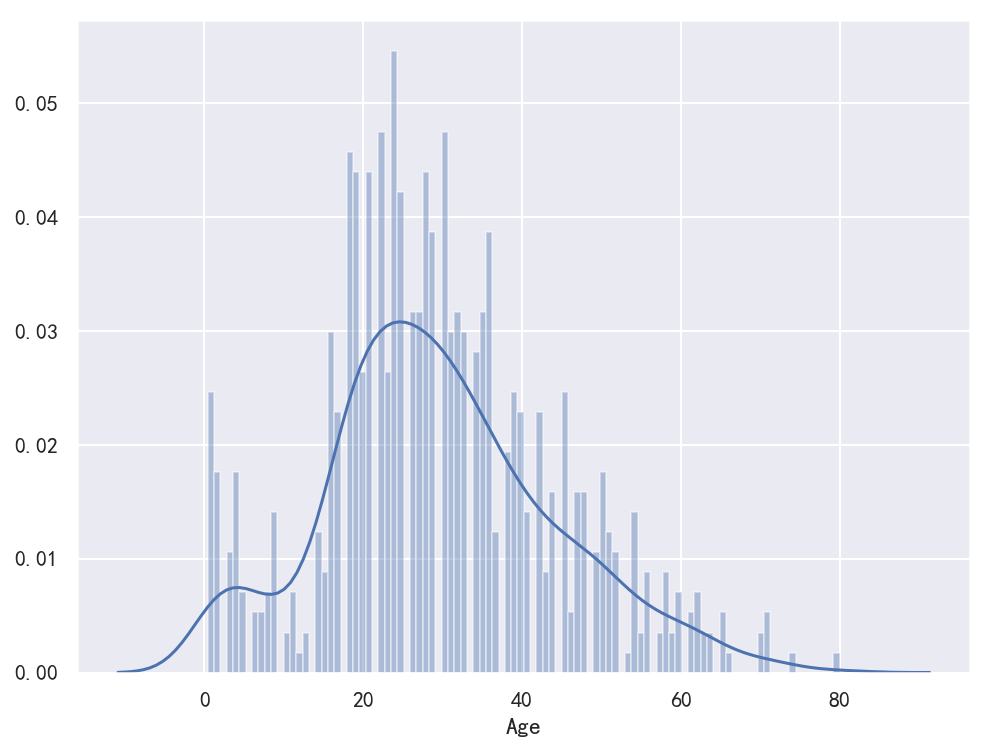

In [683]:
## Let's look at the his
plt.subplots(figsize = (8,6))
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

### Age_group feature

In [635]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age', axis=1, inplace=True)"

# 第六部分 特征预处理

In [636]:
# 拆分数据
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

In [637]:
# 将训练集分割为测试集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [638]:
# 特征标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test = sc.transform(test)

# 第七部分 构建模型

## Logistic Regression 逻辑回归

In [648]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score


logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train,y_train)
 
y_pred = logreg.predict(X_test)

print ("逻辑回归模型评估准确率是: {}".format(round(accuracy_score(y_pred, y_test),4)))

逻辑回归模型评估准确率是: 0.8027


## Grid Search on Logistic Regression 网格搜索+逻辑回归

In [640]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold,StratifiedShuffleSplit


C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## 超参数Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

## 选择交叉验证策略（10折交叉验证）
cv = 10#StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [641]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8344594594594594
{'C': 2, 'penalty': 'l1'}
LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


## K-neighbor  (KNN)

In [649]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("交叉验证准确率:{}".format(accuracies))
print ("交叉验证平均准确率: {}".format(round(accuracies.mean(),3)))

交叉验证准确率:[0.76576577 0.77027027 0.77477477 0.72522523 0.70720721 0.79279279
 0.72522523 0.75675676 0.72522523 0.73873874]
交叉验证平均准确率: 0.748


In [651]:
# 为knn模型搜索超参数K的最佳值
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("准确率分别是: {}\n".format(k_scores))
print ("平均准确率: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.7427927927927928, 0.7373873873873874, 0.7382882882882883, 0.7364864864864864, 0.7481981981981983, 0.7454954954954955, 0.7599099099099099, 0.7554054054054055, 0.7558558558558559, 0.7504504504504503, 0.7545045045045045, 0.7495495495495496, 0.7459459459459461, 0.7414414414414414, 0.7445945945945946, 0.7405405405405405, 0.7373873873873874, 0.7346846846846847, 0.7360360360360361, 0.7342342342342343, 0.7346846846846846, 0.7301801801801802, 0.7279279279279279, 0.7306306306306306, 0.7310810810810812, 0.7315315315315315, 0.731081081081081, 0.7306306306306306, 0.7265765765765766, 0.7292792792792793]

Mean accuracy score: 0.7397597597597598


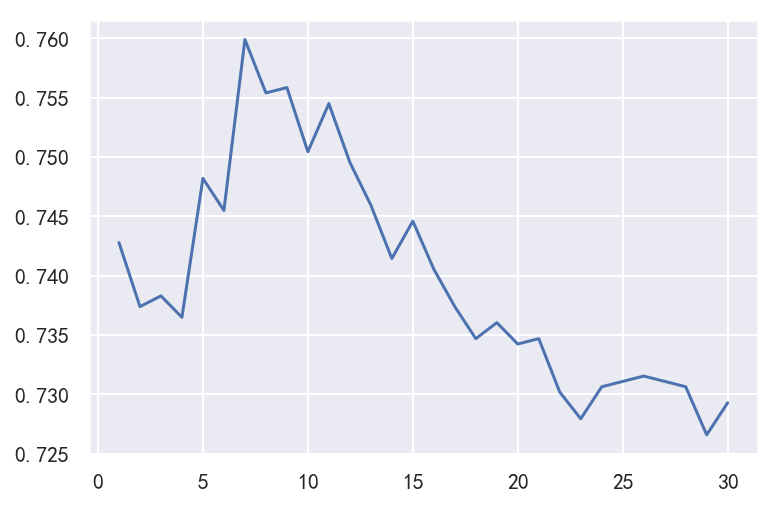

In [652]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

In [ ]:
从图表可以看出当KNN模型中超参数K最佳值为7

## Grid search on KNN classifier 网格搜索+KNN

In [653]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [654]:
print ("网格搜索交叉验证准确率：",grid.best_score_)
print ("网格搜索交叉验证最好的结果：",grid.best_params_)
print("选择最好的模型是：",grid.best_estimator_)

网格搜索交叉验证准确率： 0.7554307116104869
网格搜索交叉验证最好的结果： {'n_neighbors': 7, 'weights': 'distance'}
选择最好的模型是： KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')


## Grid search on Decision Tree 网格搜索+决策树

In [657]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
dt_grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
dt_grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [660]:
print ("网格搜索交叉验证准确率：",dt_grid.best_score_)
print ("网格搜索交叉验证最好的结果：",dt_grid.best_params_)
print("选择最好的模型是：",dt_grid.best_estimator_)

网格搜索交叉验证准确率： 0.8434684684684685
网格搜索交叉验证最好的结果： {'criterion': 'entropy', 'max_depth': 7, 'max_features': 29}
选择最好的模型是： DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=29, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [663]:
dectree_grid = dt_grid.best_estimator_
#用最好的超参数来获得最优准确率
dectree_grid.score(X,y)

0.8997747747747747

## Random Forest Classifier 随机森林

In [662]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators =[140,145,150,155,160]
max_depth = range(1,10)
criterions =['gini','entropy']
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30,random_state=15)

param ={'n_estimators':n_estimators,
        'max_depth':max_depth,
        'criterion':criterions}

grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                           param_grid=param,
                           cv =cv,
                           n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [140, 145, 150, 155, 160], 'max_depth': range(1, 10), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [664]:
print ("网格搜索交叉验证准确率：",grid.best_score_)
print ("网格搜索交叉验证最好的结果：",grid.best_params_)
print("选择最好的模型是：",grid.best_estimator_)

网格搜索交叉验证准确率： 0.8468164794007491
网格搜索交叉验证最好的结果： {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 160}
选择最好的模型是： RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [666]:
rad_dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
rad_dectree_grid.score(X,y)

0.9268018018018018

总结分析：对于该项目二分类预测问题，最佳的机器学习模型为随机森林，准确率能达到93%.

In [671]:
print('最佳模型预测结果如下：\n',rad_dectree_grid.predict(test))

最佳模型预测结果如下：
 [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


#### 此项目经验：

#### 1.对于缺失值的处理，另外一种思路是通过研究变量之间的关系，找出填充缺失值的规律；

#### 2.通过研究特征之间潜在的相关关系，以及特征工程创建新特征(分类型特征)，来避免多重共线性的影响，提高模型评估准确率；

#### 3.网格搜索交叉验证能提高模型预测的准确性及可信度，且对于二分类问题，随机森林模型能更好的预测出结果。